In [7]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Arial']
matplotlib.rcParams['font.sans-serif'] = ['System Font', 'Verdana', 'Arial']
matplotlib.rcParams['figure.figsize'] = (7, 3)   # Change the size of plots
matplotlib.rcParams['figure.dpi'] = 108

In [9]:
import numpy as np

In [22]:
# Time interval between readings
d = 1.0 / 2000.0;
# Have the time-series to be at least 3.0 seconds
K = round(3.0 / d)
# Double time in seconds
y = np.array([x for x in range(K)], dtype=np.float64) * d + 7000.0
# Clean reference of tic count in microseconds
u = np.array([x for x in range(K)], dtype=np.float64) * 1000000
# Add noise to x, on the orders of 1 millisecond
x = y + 1.0e-3 * (np.random.random(y.shape) - 0.5)

In [300]:
h_x0 = np.ones(x.shape) * np.nan
h_u0 = np.ones(x.shape) * np.nan
h_dx = np.ones(x.shape) * np.nan
t = np.ones(x.shape) * np.nan
N = 2000
b = 1.0 / N
a = 1.0 - b
u0 = u[0]
x0 = x[0]
dx = 0                              # Have nothing at all
dx = (x[1] - x[0]) / (u[1] - u[0])  # Rough estimate from the first 2 samples
# dx = 1.0e-6 * d                     # If we have a good wisdom
uu = u[N] - u[0]
xx = 0
for i in range(1, len(x)):
    if i <= N:
        x0 = x[0] + 0.5 * (x[i] - x[0]) / i
        u0 = u[0]
        dx_du = (x[i] - x[0]) / (u[i] - u[0])
    else:
        x0 = a * x0 + b * x[i]
        u0 = u[i - N]
        dx_du = (x[i] - x[i - N]) / (u[i] - u[i - N])
    dx = a * dx + b * dx_du
    h_dx[i] = dx
    h_x0[i] = x0
    h_u0[i] = u0
    t[i] = x0 + dx * (u[i] - u0)

Original jitter = 0.407444452044  ms
Smoothed jitter = 0.0505664953255  ms


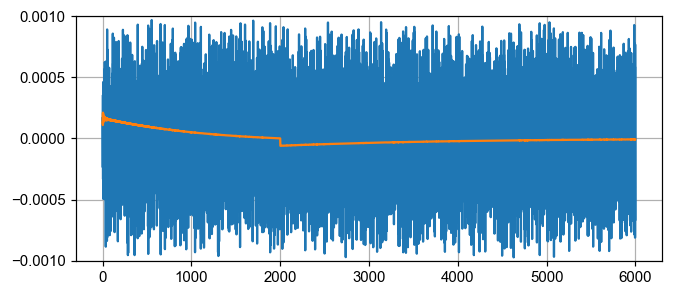

In [301]:
matplotlib.pyplot.plot(np.diff(x) - d)
matplotlib.pyplot.plot(np.diff(t) - d)
matplotlib.pyplot.ylim(np.array([-1, 1], dtype=np.float32) * 1.0e-3)
# matplotlib.pyplot.xlim(np.array([1999, 2001], dtype=np.float32))
matplotlib.pyplot.grid()
print('Original jitter =', np.nanstd(np.diff(x)) * 1.0e3, ' ms')
print('Smoothed jitter =', np.nanstd(np.diff(t)) * 1.0e3, ' ms')

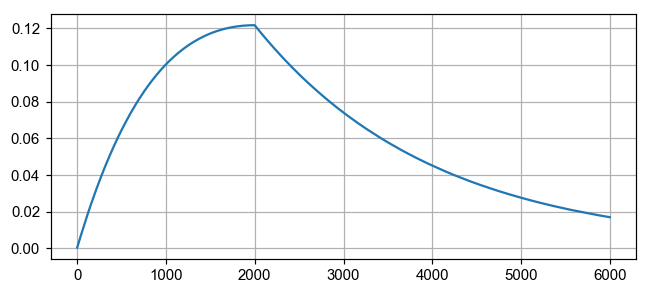

In [302]:
matplotlib.pyplot.plot(t - y)
matplotlib.pyplot.grid()

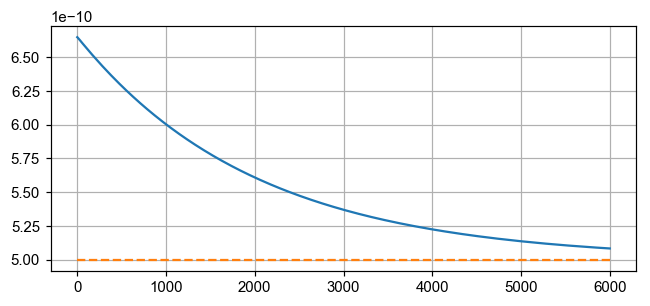

In [297]:
matplotlib.pyplot.plot(h_dx)
matplotlib.pyplot.plot([0, len(x)], np.array([1.0, 1.0]) * 1.0e-6 * d, '--')
matplotlib.pyplot.grid()

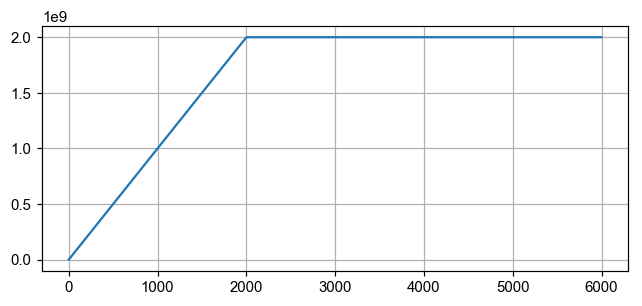

In [263]:
matplotlib.pyplot.plot(u - h_u0)
matplotlib.pyplot.grid()

(1996.0, 2010.0)

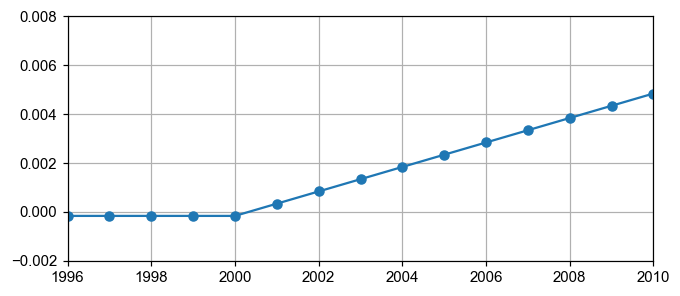

In [266]:
matplotlib.pyplot.plot(h_x0 - 7000.0, '-o')
matplotlib.pyplot.grid()
matplotlib.pyplot.ylim([-0.002, 0.008])
matplotlib.pyplot.xlim(np.array([N - 4, N + 10], dtype=np.float32))